In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.probability import FreqDist
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Sentiment Analysis

In [ ]:
df_tweets = pd.read_csv('/content/Tweet.csv')

In [ ]:
df_tweets['text'].dtype

dtype('O')

In [ ]:
regexp = RegexpTokenizer('\w+')

df_tweets['text_tokens']=df_tweets['text'].apply(regexp.tokenize)
df_tweets.head(3)

# Making a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extending the list with custom stopwords
my_stopwords = ['dunkin', 'starbucks','netflix', 'hulu', 'southwest', 'delta', 'airline',
                'bulan', 'amp', 'the', 'donut', 'like', 'qris', 'ewallet', 'jual', 'garansi', 'viu',
                'donuts', 'coffee']
stopwords.extend(my_stopwords)

# Remove stopwords
df_tweets['text_tokens'] = df_tweets['text_tokens'].apply(lambda x: [item for item in x if item not in stopwords])
#remove infrequent words
df_tweets['text_string'] = df_tweets['text_tokens'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

all_words = ' '.join([word for word in df_tweets['text_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [ ]:
df_tweets.head()

,tweet_id,date_posted,text,mentions,text_tokens,text_string
0,1622459787781840900,2023-02-06T04:58:51.000Z,noel i got you starbucks ocean the drink,Starbucks,"[noel, got, ocean, drink]",noel got ocean drink
1,1622459776083828736,2023-02-06T04:58:49.000Z,whos buying mommy her starbucks this morning ...,Starbucks,"[whos, buying, mommy, morning, coffeesub, sell...",whos buying mommy morning coffeesub sellingcon...
2,1622459674955218949,2023-02-06T04:58:25.000Z,2 girls with remote vibrators going through a...,Starbucks,"[2, girls, remote, vibrators, going, drive, tr...",girls remote vibrators going drive tru kinda h...
3,1622459637801811968,2023-02-06T04:58:16.000Z,i think hes just that dumbguess the dude got ...,Starbucks,"[think, hes, dumbguess, dude, got, kicked, aus...",think hes dumbguess dude got kicked australia ...
4,1622459620446076928,2023-02-06T04:58:12.000Z,polygon has won massmarket attention thanks t...,Starbucks,"[polygon, massmarket, attention, thanks, brand...",polygon massmarket attention thanks brands stu...


In [ ]:
#frequency distribution
fdist = FreqDist(tokenized_words)
fdist
df_tweets['text_string_fdist'] = df_tweets['text_tokens'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [ ]:
wordnet_lem = WordNetLemmatizer()

df_tweets['text_string_lem'] = df_tweets['text_string_fdist'].apply(wordnet_lem.lemmatize)

all_words_lem = ' '.join([word for word in df_tweets['text_string_lem']])

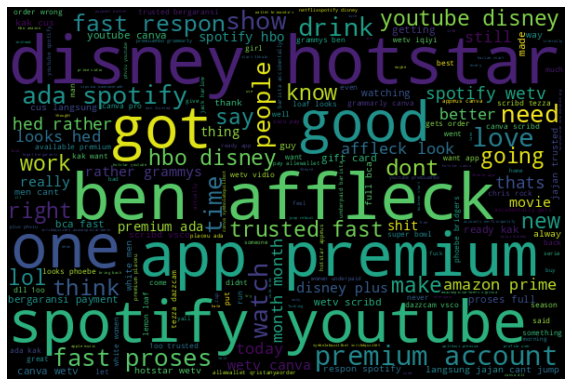

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

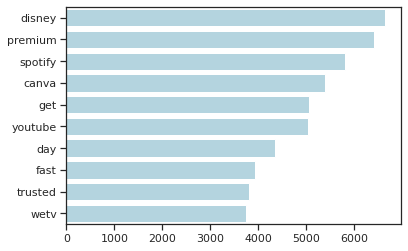

In [ ]:
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

# Obtain top 10 words
top_10 = fd.most_common(10)
# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='lightblue');

In [ ]:
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

df_tweets['polarity'] = df_tweets['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df_tweets.tail(3)

df_tweets['polarity'] = df_tweets['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))

# Change data structure
df_tweets = pd.concat([df_tweets.drop(['polarity'], axis=1), df_tweets['polarity'].apply(pd.Series)], axis=1)

# # Create new variable with sentiment "neutral," "positive" and "negative"
df_tweets['sentiment'] = df_tweets['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df_tweets.head()

,tweet_id,date_posted,text,mentions,text_tokens,text_string,text_string_fdist,text_string_lem,neg,neu,pos,compound,sentiment
0,1622459787781840900,2023-02-06T04:58:51.000Z,noel i got you starbucks ocean the drink,Starbucks,"[noel, got, ocean, drink]",noel got ocean drink,noel got ocean drink,noel got ocean drink,0.000,1.000,0.000,0.0000,neutral
1,1622459776083828736,2023-02-06T04:58:49.000Z,whos buying mommy her starbucks this morning ...,Starbucks,"[whos, buying, mommy, morning, coffeesub, sell...",whos buying mommy morning coffeesub sellingcon...,whos buying mommy morning coffeesub sellingcon...,whos buying mommy morning coffeesub sellingcon...,0.000,1.000,0.000,0.0000,neutral
2,1622459674955218949,2023-02-06T04:58:25.000Z,2 girls with remote vibrators going through a...,Starbucks,"[2, girls, remote, vibrators, going, drive, tr...",girls remote vibrators going drive tru kinda h...,girls remote vibrators going drive tru kinda h...,girls remote vibrators going drive tru kinda h...,0.000,1.000,0.000,0.0000,neutral
3,1622459637801811968,2023-02-06T04:58:16.000Z,i think hes just that dumbguess the dude got ...,Starbucks,"[think, hes, dumbguess, dude, got, kicked, aus...",think hes dumbguess dude got kicked australia ...,think hes dumbguess dude got kicked australia ...,think hes dumbguess dude got kicked australia ...,0.202,0.798,0.000,-0.5106,negative
4,1622459620446076928,2023-02-06T04:58:12.000Z,polygon has won massmarket attention thanks t...,Starbucks,"[polygon, massmarket, attention, thanks, brand...",polygon massmarket attention thanks brands stu...,polygon massmarket attention thanks brands stu...,polygon massmarket attention thanks brands stu...,0.000,0.526,0.474,0.6597,positive


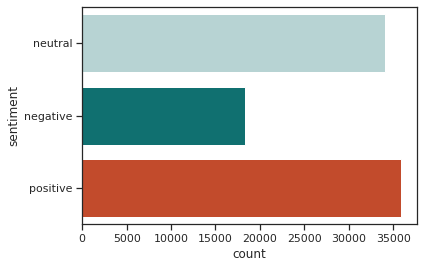

In [ ]:
# # Tweet with highest positive sentiment
df_tweets.loc[df_tweets['compound'].idxmax()].values

# # Number of tweets
sns.countplot(y='sentiment',
             data=df_tweets,
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

In [ ]:
sentiment = pd.DataFrame({'tweet_id': df_tweets['tweet_id'],
                          'sentiment_type':df_tweets['sentiment'], 'positive_factor':df_tweets['pos'],
                          'negative_factor':df_tweets['neg'], 'neutral_factor':df_tweets['neu']})

In [ ]:
sentiment.to_csv('sentiment.csv', index=False)
files.download('sentiment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>